<a href="https://colab.research.google.com/github/vijaylaxmid/cmpe258-deeplearning/blob/master/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [107]:
path = untar_data(URLs.CIFAR_100); path

PosixPath('/root/.fastai/data/cifar100')

In [108]:
path.ls()

[PosixPath('/root/.fastai/data/cifar100/test'),
 PosixPath('/root/.fastai/data/cifar100/train')]

In [0]:

path_anno = path
path_img = path/'train/trees/maple_tree'

In [110]:
path_img.ls()

[PosixPath('/root/.fastai/data/cifar100/train/trees/pine_tree'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/willow_tree'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/palm_tree'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/oak_tree')]

In [112]:
fnames = get_image_files(path_img)
fnames[:20]

[PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/sugar_maple_s_001405.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/acer_saccharinum_s_001564.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/acer_saccharum_s_000502.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/silver_maple_s_000770.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/maple_s_000274.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/acer_saccharinum_s_000193.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/red_maple_s_000735.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/sugar_maple_s_000994.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/acer_saccharinum_s_001700.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/acer_saccharum_s_001543.png'),
 PosixPath('/root/.fastai/data/cifar100/train/trees/maple_tree/silver_maple_

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

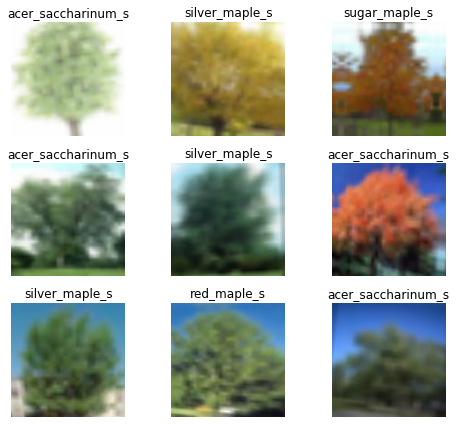

In [128]:
data.show_batch(rows=3, figsize=(7,6))

In [129]:
print(data.classes)
len(data.classes),data.c

['acer_saccharinum_s', 'acer_saccharum_s', 'maple_s', 'red_maple_s', 'rock_maple_s', 'silver_maple_s', 'sugar_maple_s']


(7, 7)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [131]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.161420,2.195377,0.770000,00:04
1,2.790368,2.351538,0.770000,00:03
2,2.570284,2.655944,0.820000,00:03
3,2.397262,2.587064,0.790000,00:03


In [0]:
learn.save('stage-1')

In [133]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

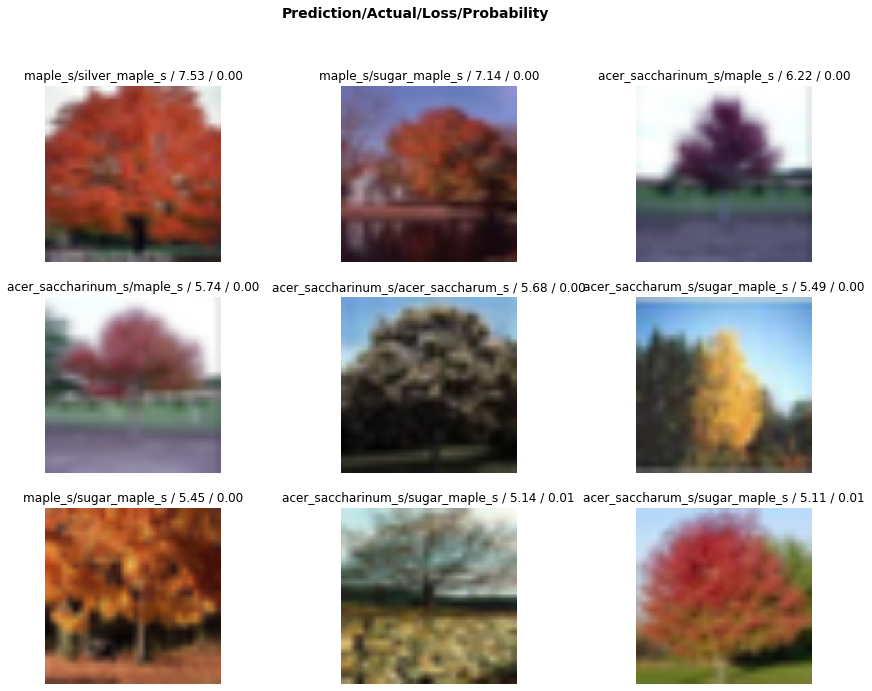

In [134]:
interp.plot_top_losses(9, figsize=(15,11))

In [135]:
doc(interp.plot_top_losses)

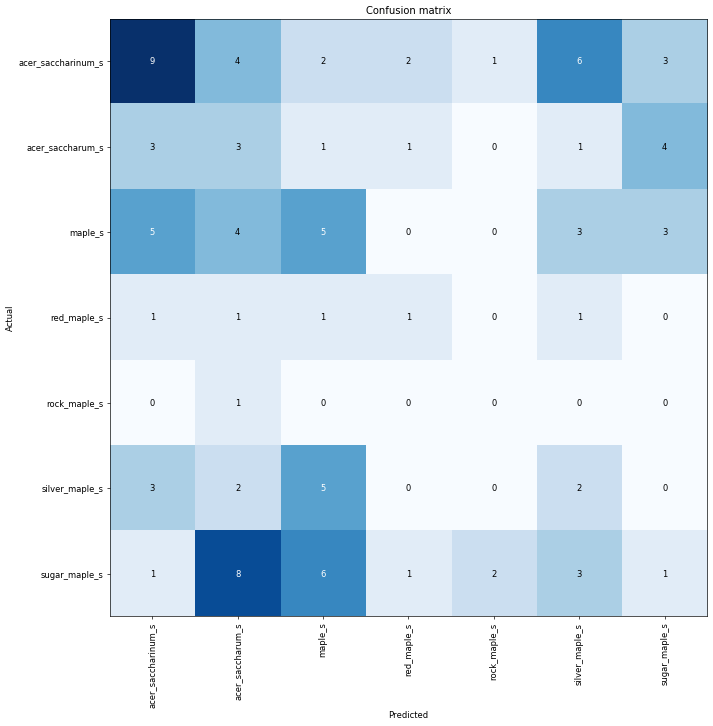

In [136]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [139]:
interp.most_confused(min_val=3)

[('sugar_maple_s', 'acer_saccharum_s', 8),
 ('acer_saccharinum_s', 'silver_maple_s', 6),
 ('sugar_maple_s', 'maple_s', 6),
 ('maple_s', 'acer_saccharinum_s', 5),
 ('silver_maple_s', 'maple_s', 5),
 ('acer_saccharinum_s', 'acer_saccharum_s', 4),
 ('acer_saccharum_s', 'sugar_maple_s', 4),
 ('maple_s', 'acer_saccharum_s', 4),
 ('acer_saccharinum_s', 'sugar_maple_s', 3),
 ('acer_saccharum_s', 'acer_saccharinum_s', 3),
 ('maple_s', 'silver_maple_s', 3),
 ('maple_s', 'sugar_maple_s', 3),
 ('silver_maple_s', 'acer_saccharinum_s', 3),
 ('sugar_maple_s', 'silver_maple_s', 3)]

In [0]:

learn.unfreeze()

In [141]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.198596,2.885010,0.610000,00:03


In [0]:
learn.load('stage-1');

In [143]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


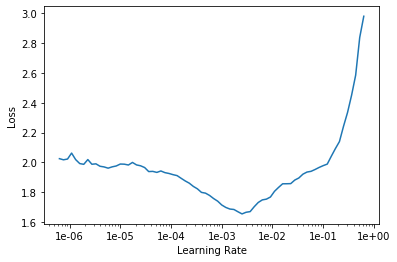

In [144]:
learn.recorder.plot()

In [145]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.015987,2.426265,0.760000,00:03
1,1.924892,2.364099,0.790000,00:04


In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [148]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


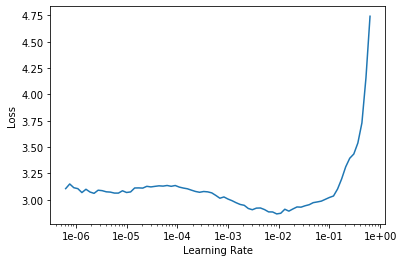

In [149]:
learn.lr_find()
learn.recorder.plot()

In [150]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.969295,2.646646,0.890000,00:10
1,2.853299,2.667130,0.770000,00:08
2,2.687713,3.051482,0.720000,00:08
3,2.443749,2.315717,0.640000,00:08
4,2.206723,2.158916,0.660000,00:08
5,1.991639,1.937566,0.640000,00:08
6,1.846850,1.875672,0.620000,00:08
7,1.733292,1.864549,0.620000,00:08


In [0]:
learn.save('stage-1-50')

In [152]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.297363,1.842963,0.590000,00:11
1,1.274443,1.817096,0.610000,00:10
2,1.305323,1.823811,0.610000,00:10


In [0]:
learn.load('stage-1-50');

In [154]:
interp = ClassificationInterpretation.from_learner(learn)

In [155]:
interp.most_confused(min_val=2)

[('sugar_maple_s', 'acer_saccharum_s', 6),
 ('sugar_maple_s', 'maple_s', 6),
 ('acer_saccharinum_s', 'acer_saccharum_s', 5),
 ('maple_s', 'sugar_maple_s', 5),
 ('acer_saccharum_s', 'sugar_maple_s', 4),
 ('silver_maple_s', 'acer_saccharinum_s', 4),
 ('sugar_maple_s', 'silver_maple_s', 4),
 ('acer_saccharum_s', 'maple_s', 3),
 ('maple_s', 'acer_saccharinum_s', 3),
 ('silver_maple_s', 'maple_s', 3),
 ('acer_saccharinum_s', 'maple_s', 2),
 ('acer_saccharum_s', 'acer_saccharinum_s', 2),
 ('maple_s', 'silver_maple_s', 2),
 ('red_maple_s', 'maple_s', 2),
 ('rock_maple_s', 'acer_saccharinum_s', 2),
 ('sugar_maple_s', 'acer_saccharinum_s', 2)]